# Image Quality Assessment

Contents:
Computation of the following on a dataset
- Mean-Squared Error
- Peak Signal to Noise Ratio
- Structural Similarity Index
- Spearman Rank Order Cross Correlation

Author: Abijith J. Kamath
https://kamath-abhijith.github.io

In [90]:
import numpy as np

from skimage import io
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse
from scipy.io import loadmat
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams

In [91]:
## HELPER FUNCTIONS

def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

In [92]:
## READ DATASET

dataset = loadmat("hw5/hw5.mat")
blur_dmos = dataset['blur_dmos'][0]
refnames_blur = dataset['refnames_blur']

blur_images = io.imread_collection('hw5/gblur/*.bmp')
num_images = sum(dataset['blur_orgs'][0] == 0)

In [93]:
## PERFORMANCE SCORES

psnr_score = np.zeros(num_images)
ssim_score = np.zeros(num_images)
for i in range(num_images):
    true_image = rgb2gray(io.imread("hw5/refimgs/"+"".join(refnames_blur[0,i])))
    blur_image = rgb2gray(blur_images[i])

    mse_score = mse(blur_image, true_image)
    psnr_score[i] = 10.0*np.log10(255.0/mse_score)
    ssim_score[i] = ssim(blur_image, true_image, data_range=true_image.max() - true_image.min())


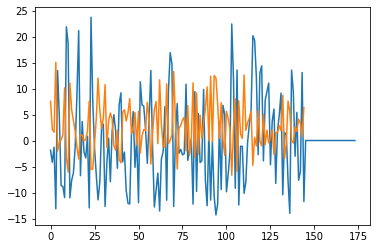

In [95]:

plt.figure()
plt.plot(0.5*(blur_dmos - np.mean(blur_dmos)))
plt.plot(psnr_score)
plt.show()